# Data Loading

In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [80]:
import pickle

def loadDataPickle(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [81]:
pickle = loadDataPickle('WikipediaMovieDataset.pickle')
movies = pd.DataFrame(pickle)
movies.head()

,Title,Directed by,Produced by,Cinematography,Runtime,Distributed by,Language,Written by,Cast,Edited by,Production companies,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office,Box Office Status
0,Daybreakers,[The Spierig Brothers],"[Chris Brown, Sean Furst, Bryan Furst]",[Ben Nott],98,"[Lionsgate (United States), Hoyts Distribution...",English,[The Spierig Brothers],"[Ethan Hawke, Willem Dafoe, Claudia Karvan, Mi...",[Matt Villa],"[Lionsgate, Screen Australia, Pictures in Para...",11,9,2009,R,0.642857,20000000,51400000,Success
1,Leap Year,[Anand Tucker],"[Gary Barber, Chris Bender, Roger Birnbaum, Jo...",[Newton Thomas Sigel],100,"[Universal Pictures (United States), Optimum R...",English,"[Harry Elfont, Deborah Kaplan]","[Amy Adams, Matthew Goode, Adam Scott, John Li...",[Nick Moore],"[Spyglass Entertainment, BenderSpink]",6,1,2010,PG,0.830000,19000000,32700000,Failure
2,Youth in Revolt,[Miguel Arteta],[David Permut],[Chuy Chávez],89,[Dimension Films],English,[Gustin Nash],"[Michael Cera, Portia Doubleday, Jean Smart, M...","[Pamela Martin, Andy Keir]","[Permut, Shangri-La Entertainment]",19,10,2009,R,0.780000,18000000,19700000,Failure
3,The Book of Eli,[The Hughes Brothers],"[Joel Silver, Denzel Washington, Broderick Joh...",[Don Burgess],118,"[Warner Bros. Pictures, (North America), Summ...",English,[Gary Whitta],"[Denzel Washington, Gary Oldman, Mila Kunis, R...",[Cindy Mollo],"[Alcon Entertainment, Silver Pictures]",15,1,2010,R,0.880000,80000000,157100000,Failure
4,The Spy Next Door,[Brian Levant],[Robert Simonds],[Dean Cundey],94,"[Lionsgate, (United States), Mandate Pictures...",English,"[Jonathan Bernstein, James Greer, Gregory Poir...","[Jackie Chan, Amber Valletta, Madeline Carroll...",[Lawrence Jordan],[Relativity Media],22,12,2009,PG,0.580000,28000000,45200000,Failure


In [82]:
# Drop the "Language" column
movies = movies.drop("Language", axis=1)

In [83]:
cinema = movies.loc[0, 'Cinematography']
print(cinema[0])

Ben Nott


In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 1761 non-null   object 
 1   Directed by           1761 non-null   object 
 2   Produced by           1761 non-null   object 
 3   Cinematography        1761 non-null   object 
 4   Runtime               1761 non-null   int64  
 5   Distributed by        1761 non-null   object 
 6   Written by            1761 non-null   object 
 7   Cast                  1761 non-null   object 
 8   Edited by             1761 non-null   object 
 9   Production companies  1761 non-null   object 
 10  Release Day           1761 non-null   int32  
 11  Release Month         1761 non-null   int32  
 12  Release Year          1761 non-null   int64  
 13  Age Rating            1761 non-null   object 
 14  SentimentScore        1761 non-null   float64
 15  Budget               

In [85]:
numRows = movies.shape[0]
print(numRows)

1761


# Data Analysis

In [86]:
highestBudget = movies['Budget'].max()
lowestBudget = movies['Budget'].min()

print("Highest Budget:", highestBudget)
print("Lowest Budget:", lowestBudget)

Highest Budget: 447000000
Lowest Budget: 50000


In [87]:
highestBoxOffice = movies['Box Office'].max()
lowestBoxOffice = movies['Box Office'].min()

print(f"Highest Box Office: {highestBoxOffice}")
print(f"Lowest Box Office: {lowestBoxOffice}")

Highest Box Office: 2923000000
Lowest Box Office: 15071


In [88]:
# movies = movies[movies['Budget'] <= 100000000] # 100 million
# movies = movies[movies['Box Office'] <= 1500000000] # 1.5 billion

In [89]:
movies.shape[0]

1761

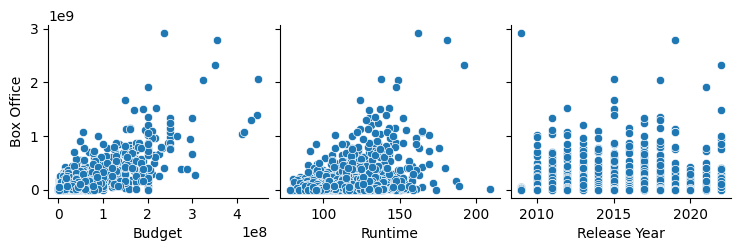

In [90]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars=['Budget', 'Runtime', 'Release Year'])

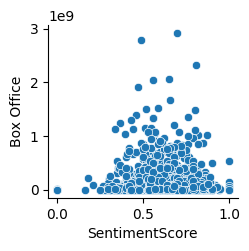

In [91]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'SentimentScore')

In [92]:
corrBudBox = movies['Budget'].corr(movies['Box Office'])
corrRunBox = movies['Runtime'].corr(movies['Box Office'])
corrSentiBox = movies['SentimentScore'].corr(movies['Box Office'])
corrReleaseBox = movies['Release Year'].corr(movies['Box Office'])

print("Correlation Between Budget and Box Office:", corrBudBox)
print("Correlation Between Runtime and Box Office:", corrRunBox)
print("Correlation Between SentimentScore and Box Office:", corrSentiBox)
print("Correlation Between SentimentScore and Box Office:", corrReleaseBox)

Correlation Between Budget and Box Office: 0.7749257709753234
Correlation Between Runtime and Box Office: 0.42377339921730034
Correlation Between SentimentScore and Box Office: -0.01422998458585873
Correlation Between SentimentScore and Box Office: 0.013645384099439285


In [93]:
summaryStats = movies[['Runtime', 'SentimentScore', 'Budget', 'Box Office']].describe()
print(summaryStats)

           Runtime  SentimentScore        Budget    Box Office
count  1761.000000     1761.000000  1.761000e+03  1.761000e+03
mean    110.785349        0.631376  4.458517e+07  1.344263e+08
std      17.566867        0.145385  5.734977e+07  2.498002e+08
min      78.000000        0.000000  5.000000e+04  1.507100e+04
25%      98.000000        0.534483  1.000000e+07  1.130000e+07
50%     108.000000        0.640000  2.500000e+07  4.860000e+07
75%     121.000000        0.730000  5.000000e+07  1.420000e+08
max     209.000000        1.000000  4.470000e+08  2.923000e+09


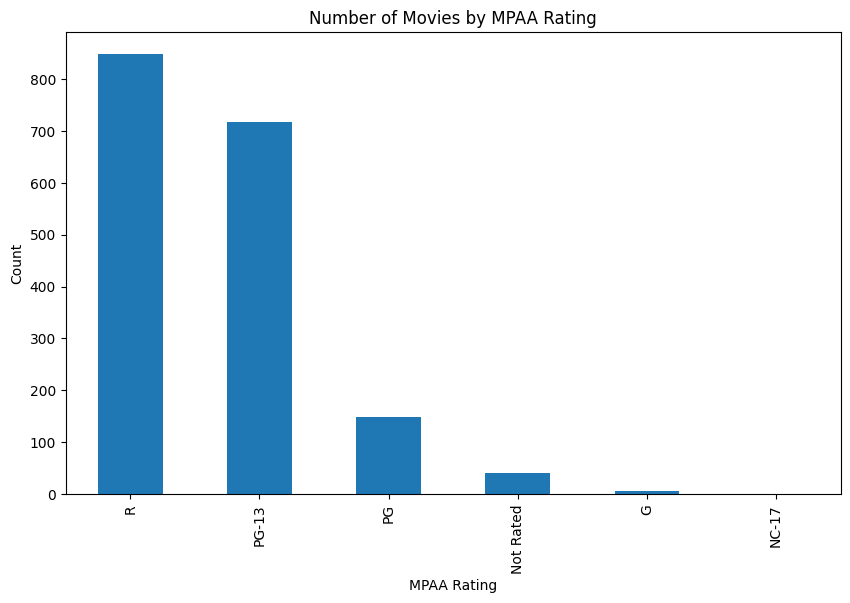

In [94]:
# Count the Number of Movies for Each Language
ratingCounts = movies['Age Rating'].value_counts()

# Plot the Bar Chart
plt.figure(figsize=(10, 6))
ratingCounts.plot(kind='bar')
plt.title('Number of Movies by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Count')
plt.show()

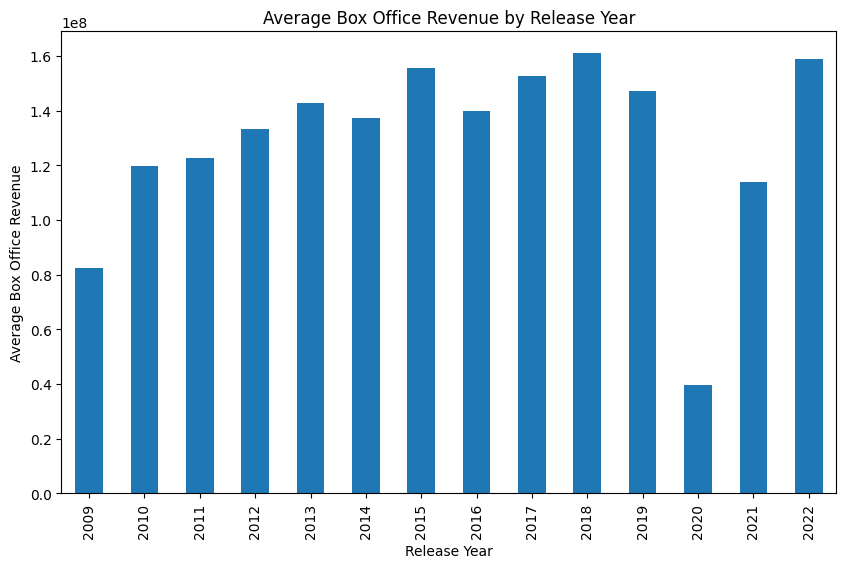

In [95]:
# Group Movies by Release Year and Calculate the Mean Box Office Revenue
yearlyBoxOffice = movies.groupby('Release Year')['Box Office'].mean()

# Plot the Box Office Revenue by Release Year
plt.figure(figsize=(10, 6))
yearlyBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Box Office Revenue')
plt.show()

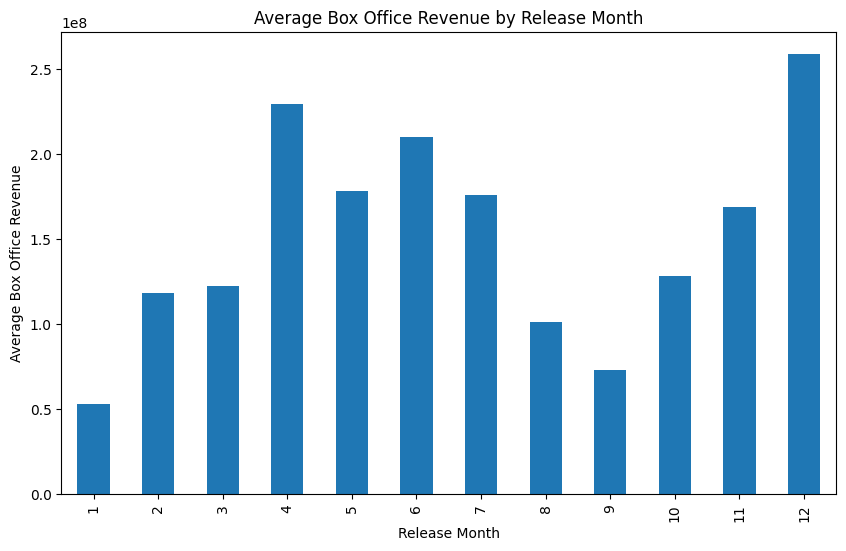

In [96]:
# Group Movies by Release Month and Calculate the Mean Box Office Revenue
monthlyBoxOffice = movies.groupby('Release Month')['Box Office'].mean()

# Plot the Box Office Revenue by Release Month
plt.figure(figsize=(10, 6))
monthlyBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Box Office Revenue')
plt.show()

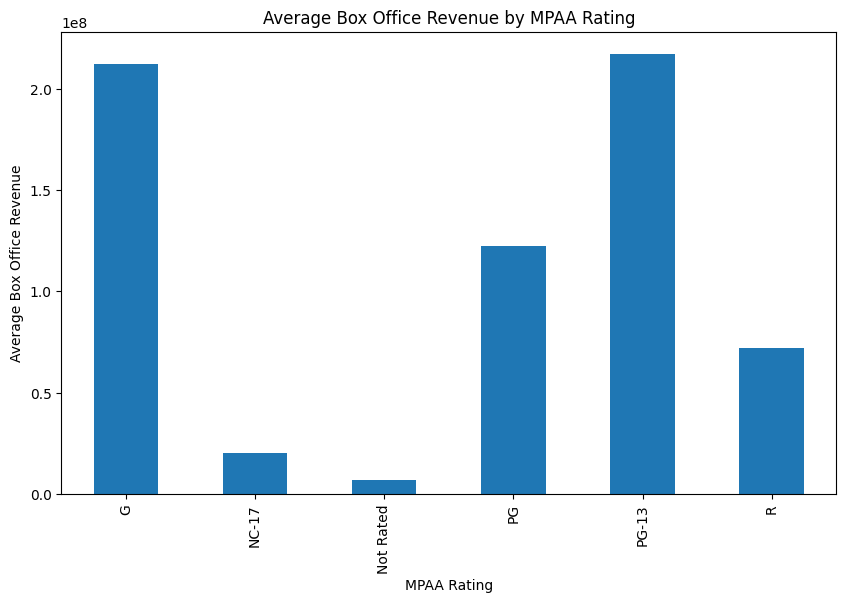

In [97]:
# Group Movies by Rating and Calculate the Mean Box Office Revenue
ratingBoxOffice = movies.groupby('Age Rating')['Box Office'].mean()

# Plot the Box Office Revenue by Release Month
plt.figure(figsize=(10, 6))
ratingBoxOffice.plot(kind='bar')
plt.title('Average Box Office Revenue by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Average Box Office Revenue')
plt.show()

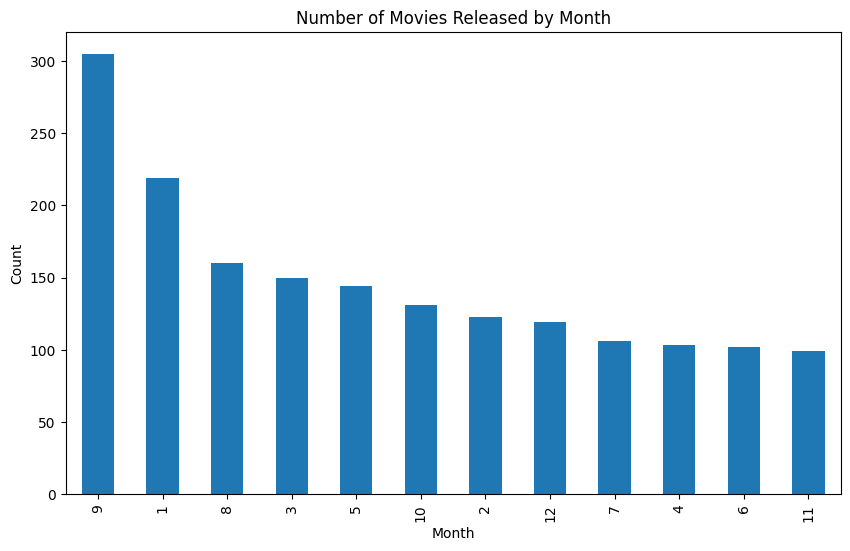

In [98]:
# Can Help To See Which Months Most Movies Are Released
monthCounts = movies['Release Month'].value_counts()

plt.figure(figsize=(10, 6))
monthCounts.plot(kind='bar')
plt.title('Number of Movies Released by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

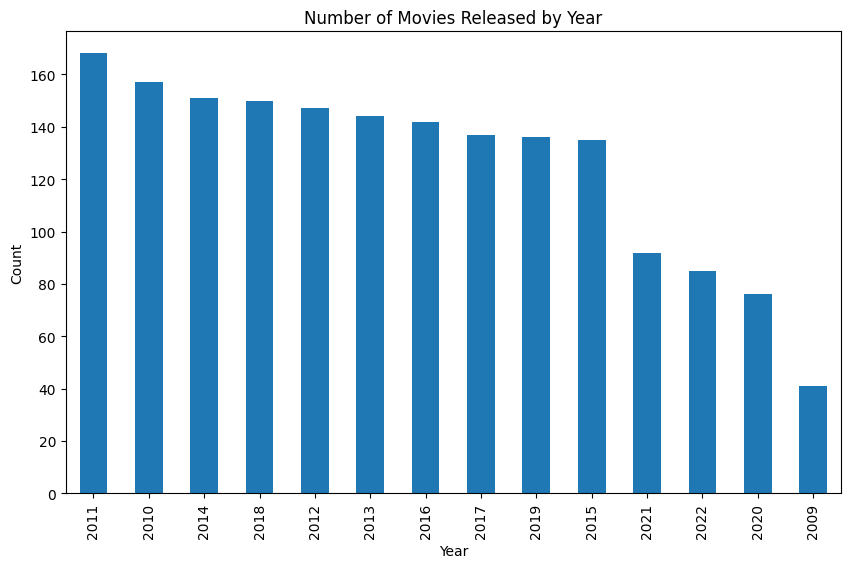

In [99]:
# Can Help To See Which Months Most Movies Are Released
monthCounts = movies['Release Year'].value_counts()

plt.figure(figsize=(10, 6))
monthCounts.plot(kind='bar')
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

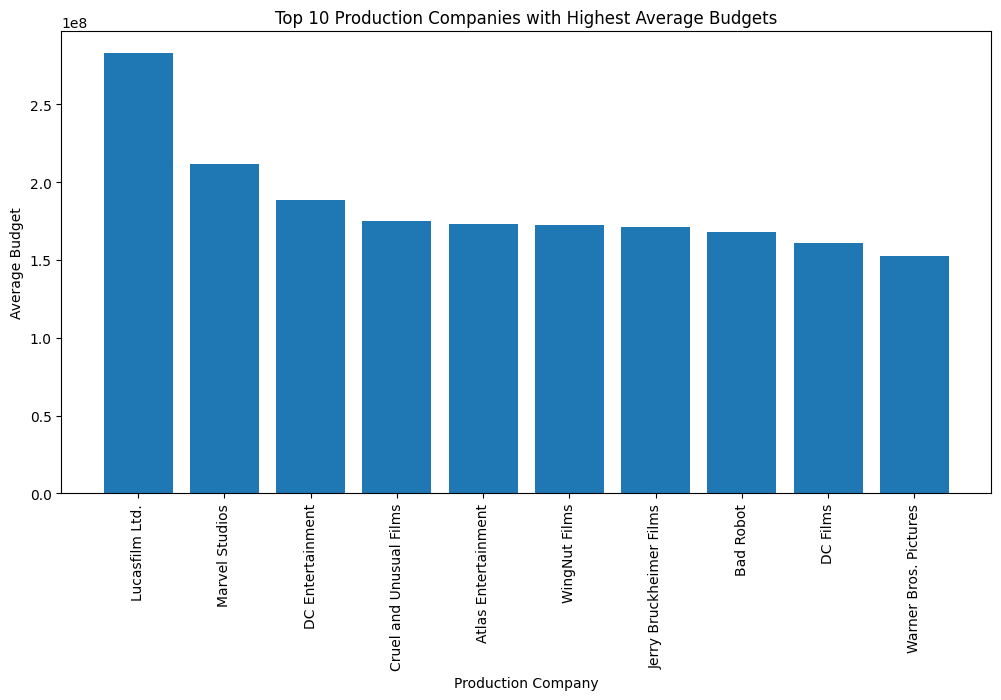

In [100]:
# Flatten The List Of Lists
allCompanies = [company for sublist in movies['Production companies'] for company in sublist]

# Get Unique Companies
productionCompanies = list(set(allCompanies))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBudgets = {company: movies[movies['Production companies'].apply(lambda x: company in x)]['Budget'].mean() 
                    for company in productionCompanies 
                    if allCompanies.count(company) >= threshold}

# Sort The Dictionary By Value In Descending Order And Get The Top 10
top10Companies = sorted(averageBudgets.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract The Company Names And Their Corresponding Budgets
companies, budgets = zip(*top10Companies)

# Plot The Data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Production Companies with Highest Average Budgets')
plt.xlabel('Production Company')
plt.ylabel('Average Budget')
plt.bar(companies, budgets)
plt.show()

Actors, Directors, Companies With Highest Average Box Office Revenue

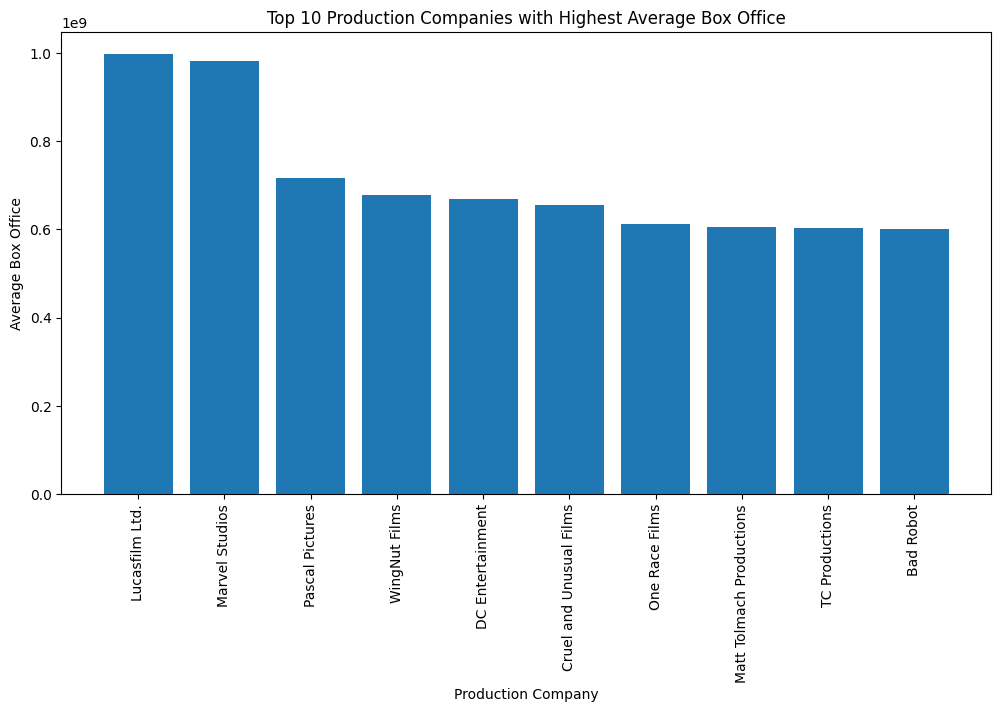

In [101]:
# Flatten The List Of Lists
allCompanies = [company for sublist in movies['Production companies'] for company in sublist]

# Get Unique Companies
productionCompanies = list(set(allCompanies))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBudgets = {company: movies[movies['Production companies'].apply(lambda x: company in x)]['Box Office'].mean() 
                    for company in productionCompanies 
                    if allCompanies.count(company) >= threshold}

# Sort The Dictionary By Value In Descending Order And Get The Top 10
top10Companies = sorted(averageBudgets.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract The Company Names And Their Corresponding Budgets
companies, budgets = zip(*top10Companies)

# Plot The Data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Production Companies with Highest Average Box Office')
plt.xlabel('Production Company')
plt.ylabel('Average Box Office')
plt.bar(companies, budgets)
plt.show()

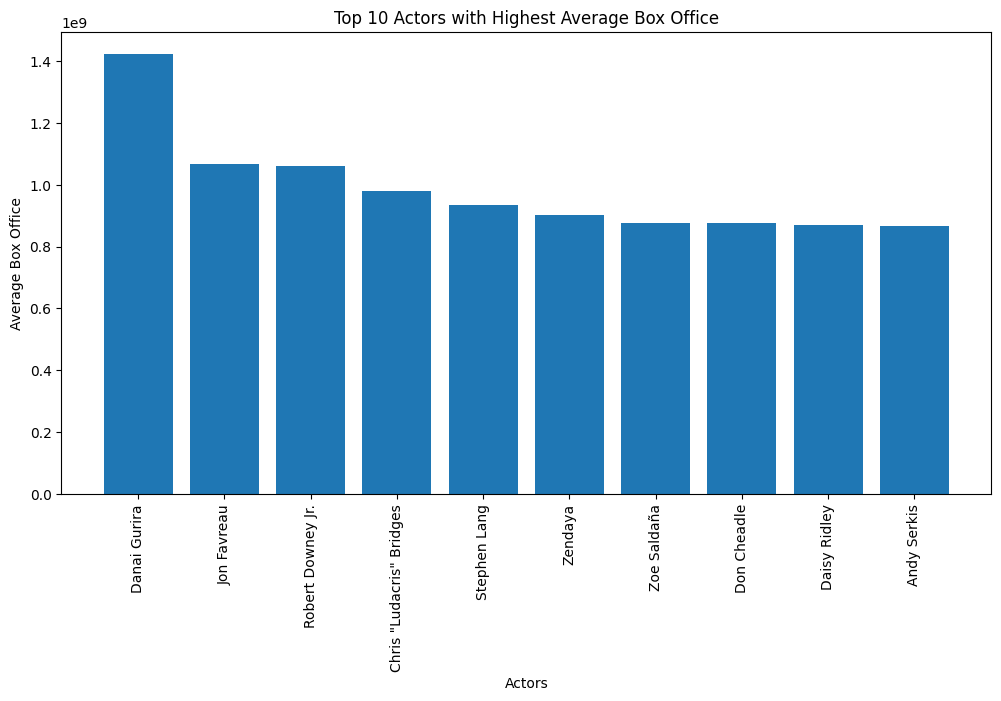

In [102]:
# Flatten The List Of Lists
allActors = [actor for sublist in movies['Cast'] for actor in sublist]

# Get Unique Actors
actors = list(set(allActors))
# print(actors.index('Screen Australia'))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Production Company
averageBoxOfficeActor = {actor: movies[movies['Cast'].apply(lambda x: actor in x)]['Box Office'].mean() for actor in actors 
                            if allActors.count(actor) >= threshold}

# Sort the dictionary by value in descending order and get the top 10
top10Actors = sorted(averageBoxOfficeActor.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the company names and their corresponding budgets
actors, boxOffice = zip(*top10Actors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Actors with Highest Average Box Office')
plt.xlabel('Actors')
plt.ylabel('Average Box Office')
plt.bar(actors, boxOffice)
plt.show()

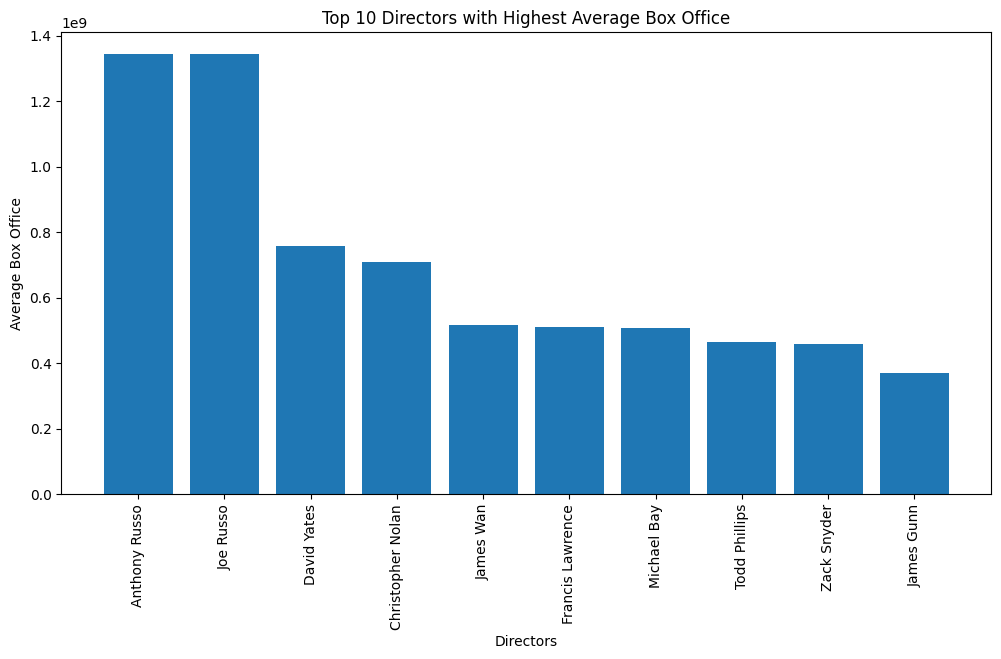

In [103]:
# Flatten The List Of Lists
allDirectors = [director for sublist in movies['Directed by'] for director in sublist]

# Get Unique Directors
directors = list(set(allDirectors))

# Set A Threshold For The Minimum Number Of Movies
threshold = 5

# Calculate Average Budgets For Each Director
averageBoxOfficeDirector = {director: movies[movies['Directed by'].apply(lambda x: director in x)]['Box Office'].mean() for director in directors 
                            if allDirectors.count(director) >= threshold}

# Sort the dictionary by value in descending order and get the top 10
top10Directors = sorted(averageBoxOfficeDirector.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the Director names and their corresponding budgets
directors, boxOffice = zip(*top10Directors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Directors with Highest Average Box Office')
plt.xlabel('Directors')
plt.ylabel('Average Box Office')
plt.bar(directors, boxOffice)
plt.show()

Actors, Directors, Companies With Most Number Of Successful Movies

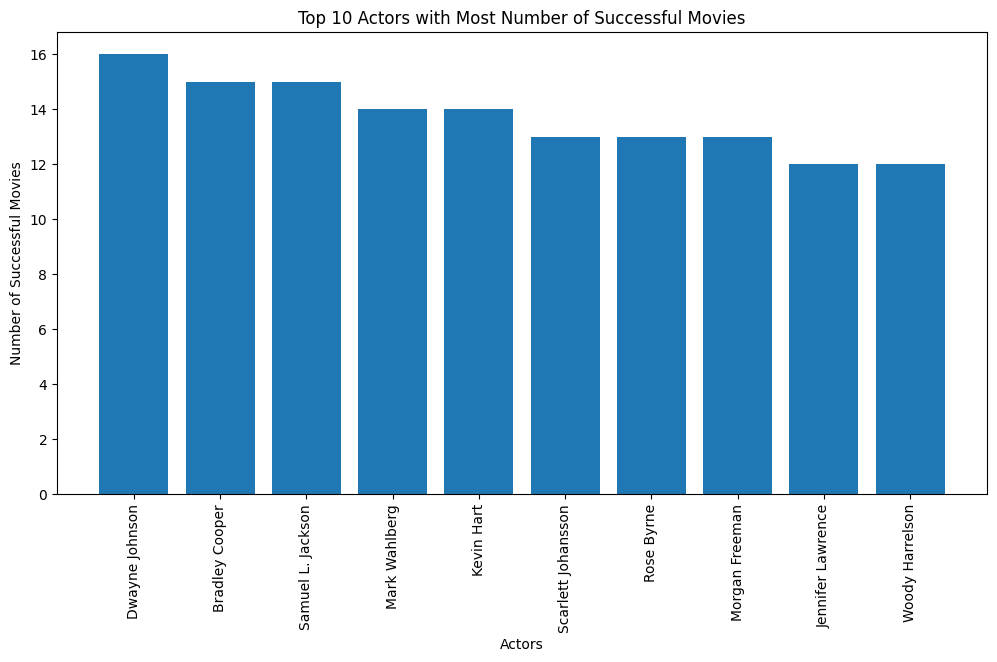

In [104]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of actors from the successful movies
successfulActors = [actor for sublist in successfulMovies['Cast'] for actor in sublist]

# Count the number of successful movies for each actor
actorSuccessCount = {actor: successfulActors.count(actor) for actor in successfulActors}

# Sort the dictionary by value in descending order and get the top 10
top10SuccessfulActors = sorted(actorSuccessCount.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the actor names and their corresponding counts
actors, successCounts = zip(*top10SuccessfulActors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Actors with Most Number of Successful Movies')
plt.xlabel('Actors')
plt.ylabel('Number of Successful Movies')
plt.bar(actors, successCounts)
plt.show()

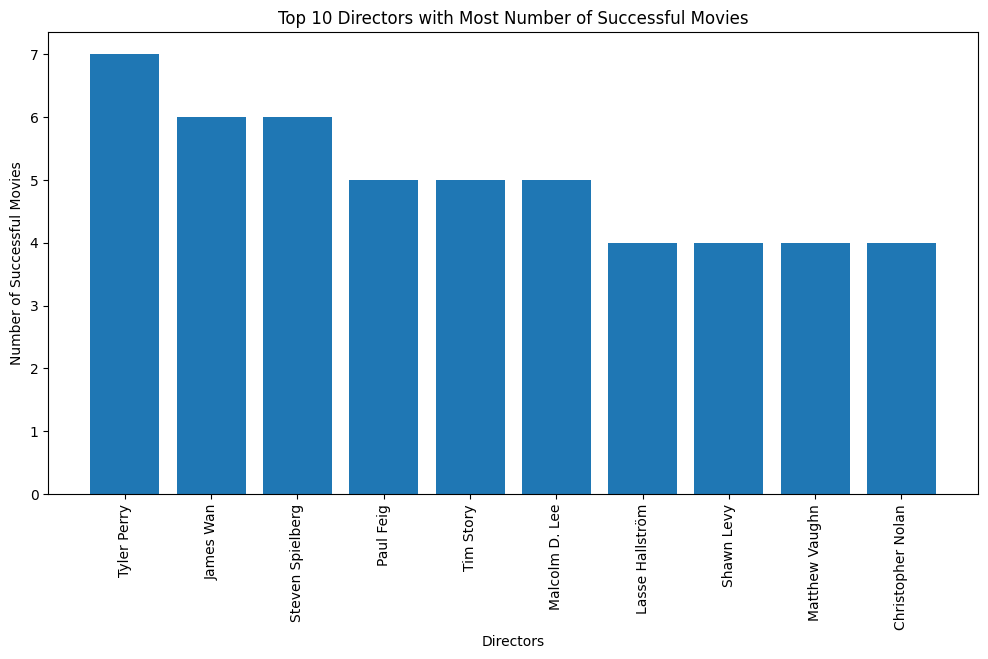

In [105]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of actors from the successful movies
successfulDirectors = [director for sublist in successfulMovies['Directed by'] for director in sublist]

# Count the number of successful movies for each actor
directorSuccessCount = {director: successfulDirectors.count(director) for director in successfulDirectors}

# Sort the dictionary by value in descending order and get the top 10
top10SuccessfulDirectors = sorted(directorSuccessCount.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the actor names and their corresponding counts
directors, successCounts = zip(*top10SuccessfulDirectors)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Directors with Most Number of Successful Movies')
plt.xlabel('Directors')
plt.ylabel('Number of Successful Movies')
plt.bar(directors, successCounts)
plt.show()

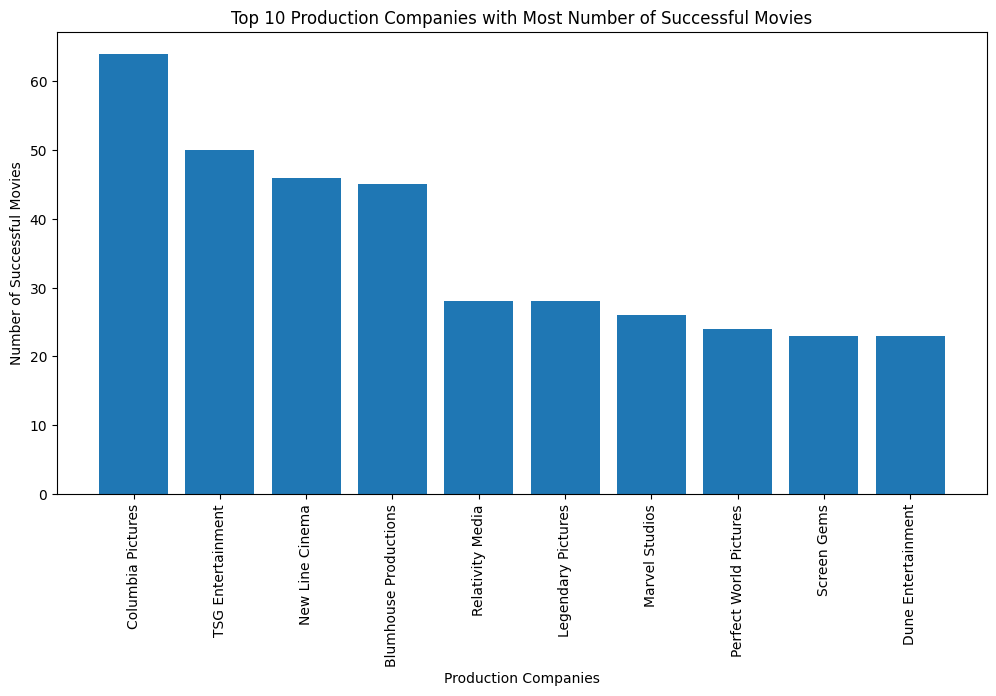

In [106]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of actors from the successful movies
successfulCompanies = [company for sublist in successfulMovies['Production companies'] for company in sublist]

# Count the number of successful movies for each actor
companySuccessCount = {company: successfulCompanies.count(company) for company in successfulCompanies}

# Sort the dictionary by value in descending order and get the top 10
top10SuccessfulCompanies = sorted(companySuccessCount.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the actor names and their corresponding counts
companies, successCounts = zip(*top10SuccessfulCompanies)

# Plot the data
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Top 10 Production Companies with Most Number of Successful Movies')
plt.xlabel('Production Companies')
plt.ylabel('Number of Successful Movies')
plt.bar(companies, successCounts)
plt.show()

## Success Score

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 1761 non-null   object 
 1   Directed by           1761 non-null   object 
 2   Produced by           1761 non-null   object 
 3   Cinematography        1761 non-null   object 
 4   Runtime               1761 non-null   int64  
 5   Distributed by        1761 non-null   object 
 6   Written by            1761 non-null   object 
 7   Cast                  1761 non-null   object 
 8   Edited by             1761 non-null   object 
 9   Production companies  1761 non-null   object 
 10  Release Day           1761 non-null   int32  
 11  Release Month         1761 non-null   int32  
 12  Release Year          1761 non-null   int64  
 13  Age Rating            1761 non-null   object 
 14  SentimentScore        1761 non-null   float64
 15  Budget               

Actors Success Score

In [30]:
# Success score is the ratio of successful movies to total movies for each actor

# # Filter the DataFrame to only include successful movies
# successfulMovies = movies[movies['Box Office Status'] == 'Success']

# # Flatten the list of actors from the successful movies
# successfulActors = [actor for sublist in successfulMovies['Cast'] for actor in sublist]

# # Count the total number of movies for each actor
# actorMoviesCount = {actor: sum(actor in movieCast for movieCast in movies['Cast']) for actor in successfulActors}

# # Count the number of successful movies for each actor
# actorSuccessCount = {actor: successfulActors.count(actor) for actor in successfulActors}

# # Calculate the success score for each actor
# actorSuccessScore = {actor: actorSuccessCount[actor] / actorMoviesCount[actor] for actor in actorMoviesCount}

# # Function to calculate the cast success score for a movie
# def castSuccessScore(cast):
#     return sum(actorSuccessScore.get(actor, 0) for actor in cast) / len(cast)

# # Calculate the cast success score for each movie
# movies['Cast Success Score'] = movies['Cast'].apply(castSuccessScore)

In [31]:
# No weighting of the success score for each actor

# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of actors from the successful movies
successfulActors = [actor for sublist in successfulMovies['Cast'] for actor in sublist]

# Count the total number of movies for each actor
actorMoviesCount = {actor: sum(actor in movieCast for movieCast in movies['Cast']) for actor in successfulActors}

# Count the number of successful movies for each actor
actorSuccessCount = {actor: successfulActors.count(actor) for actor in successfulActors}

# Count the number of failed movies for each actor
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedActors = [actor for sublist in failedMovies['Cast'] for actor in sublist]
actorFailureCount = {actor: failedActors.count(actor) for actor in successfulActors}

# Calculate the success score for each actor
actorSuccessScore = {actor: (actorSuccessCount[actor] - actorFailureCount.get(actor, 0)) / actorMoviesCount[actor] for actor in actorMoviesCount}

# Function to calculate the cast success score for a movie
def calculateCastSuccessScore(cast):
    return sum(actorSuccessScore.get(actor, 0) for actor in cast) / len(cast)

# Calculate the cast success score for each movie
movies['Cast Success Score'] = movies['Cast'].apply(calculateCastSuccessScore)

In [32]:
# Assign a score to each movie based on the weighted cast success score
# Cast sucess score is calculated as the average of the success scores of all actors in the cast
# Success score is calculated as the difference between the number of successful movies and the number of failed movies divided by the total number of movies

# # Filter the DataFrame to only include successful movies
# successfulMovies = movies[movies['Box Office Status'] == 'Success']

# # Flatten the list of actors from the successful movies
# successfulActors = [actor for sublist in successfulMovies['Cast'] for actor in sublist]

# # Count the total number of movies for each actor
# actorMoviesCount = {actor: sum(actor in movieCast for movieCast in movies['Cast']) for actor in successfulActors}

# # Count the number of successful movies for each actor
# actorSuccessCount = {actor: successfulActors.count(actor) for actor in successfulActors}

# # Count the number of failed movies for each actor
# failedMovies = movies[movies['Box Office Status'] == 'Failure']
# failedActors = [actor for sublist in failedMovies['Cast'] for actor in sublist]
# actorFailureCount = {actor: failedActors.count(actor) for actor in successfulActors}

# # Calculate the success score for each actor
# actorSuccessScore = {actor: (actorSuccessCount[actor] - actorFailureCount.get(actor, 0)) / actorMoviesCount[actor] for actor in actorMoviesCount}

# # Function to calculate the cast success score for a movie
# def castSuccessScore(cast):
#     if len(cast) == 0:
#         return 0
#     elif len(cast) == 1:
#         return actorSuccessScore.get(cast[0], 0)
#     else:
#         leadActorScore = 0.5 * actorSuccessScore.get(cast[0], 0)
#         otherActorsScore = 0.5 * sum(actorSuccessScore.get(actor, 0) for actor in cast[1:]) / (len(cast) - 1)
#         return leadActorScore + otherActorsScore

# # Calculate the cast success score for each movie
# movies['Cast Success Score'] = movies['Cast'].apply(castSuccessScore)

Directors Success Score

In [33]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of directors from the successful movies
successfulDirectors = [director for sublist in successfulMovies['Directed by'] for director in sublist]

# Count the total number of movies for each director
directorMoviesCount = {director: sum(director in movieDirectors for movieDirectors in movies['Directed by']) for director in successfulDirectors}

# Count the number of successful movies for each director
directorSuccessCount = {director: successfulDirectors.count(director) for director in successfulDirectors}

# Count the number of failed movies for each director
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedDirectors = [director for sublist in failedMovies['Directed by'] for director in sublist]
directorFailureCount = {director: failedDirectors.count(director) for director in successfulDirectors}

# Calculate the success score for each director
directorSuccessScore = {director: (directorSuccessCount[director] - directorFailureCount.get(director, 0)) / directorMoviesCount[director] for director in directorMoviesCount}

# Function to calculate the director success score for a movie
def calculateDirectorSuccessScore(directors):
    return sum(directorSuccessScore.get(director, 0) for director in directors) / len(directors)

# Calculate the director success score for each movie
movies['Director Success Score'] = movies['Directed by'].apply(calculateDirectorSuccessScore)

Producers Success Score

In [34]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of producers from the successful movies
successfulProducers = [producer for sublist in successfulMovies['Produced by'] for producer in sublist]

# Count the total number of movies for each producer
producerMoviesCount = {producer: sum(producer in movieProducers for movieProducers in movies['Produced by']) for producer in successfulProducers}

# Count the number of successful movies for each producer
producerSuccessCount = {producer: successfulProducers.count(producer) for producer in successfulProducers}

# Count the number of failed movies for each producer
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedProducers = [producer for sublist in failedMovies['Produced by'] for producer in sublist]
producerFailureCount = {producer: failedProducers.count(producer) for producer in successfulProducers}

# Calculate the success score for each producer
producerSuccessScore = {producer: (producerSuccessCount[producer] - producerFailureCount.get(producer, 0)) / producerMoviesCount[producer] for producer in producerMoviesCount}

# Function to calculate the producer success score for a movie
def calculateProducerSuccessScore(producers):
    return sum(producerSuccessScore.get(producer, 0) for producer in producers) / len(producers)

# Calculate the producer success score for each movie
movies['Producer Success Score'] = movies['Produced by'].apply(calculateProducerSuccessScore)

Cinematographers Success Score

In [35]:
# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of cinematographers from the successful movies
successfulCinematographers = [cinematographer for sublist in successfulMovies['Cinematography'] for cinematographer in sublist]

# Count the total number of movies for each cinematographer
cinematographerMoviesCount = {cinematographer: sum(cinematographer in movieCinematographers for movieCinematographers in movies['Cinematography']) for cinematographer in successfulCinematographers}

# Count the number of successful movies for each cinematographer
cinematographerSuccessCount = {cinematographer: successfulCinematographers.count(cinematographer) for cinematographer in successfulCinematographers}

# Count the number of failed movies for each cinematographer
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedCinematographers = [cinematographer for sublist in failedMovies['Cinematography'] for cinematographer in sublist]
cinematographerFailureCount = {cinematographer: failedCinematographers.count(cinematographer) for cinematographer in successfulCinematographers}

# Calculate the success score for each cinematographer
cinematographerSuccessScore = {cinematographer: (cinematographerSuccessCount[cinematographer] - cinematographerFailureCount.get(cinematographer, 0)) / cinematographerMoviesCount[cinematographer] for cinematographer in cinematographerMoviesCount}

# Function to calculate the cinematographer success score for a movie
def calculateCinematographerSuccessScore(cinematographers):
    return sum(cinematographerSuccessScore.get(cinematographer, 0) for cinematographer in cinematographers) / len(cinematographers)

# Calculate the cinematographer success score for each movie
movies['Cinematographer Success Score'] = movies['Cinematography'].apply(calculateCinematographerSuccessScore)

Distributors Success Score

In [36]:
# No weighting of the success score for each distributor

# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of distributors from the successful movies
successfulDistributors = [distributor for sublist in successfulMovies['Distributed by'] for distributor in sublist]

# Count the total number of movies for each distributor
distributorMoviesCount = {distributor: sum(distributor in movieDistributors for movieDistributors in movies['Distributed by']) for distributor in successfulDistributors}

# Count the number of successful movies for each distributor
distributorSuccessCount = {distributor: successfulDistributors.count(distributor) for distributor in successfulDistributors}

# Count the number of failed movies for each distributor
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedDistributors = [distributor for sublist in failedMovies['Distributed by'] for distributor in sublist]
distributorFailureCount = {distributor: failedDistributors.count(distributor) for distributor in successfulDistributors}

# Calculate the success score for each distributor
distributorSuccessScore = {distributor: (distributorSuccessCount[distributor] - distributorFailureCount.get(distributor, 0)) / distributorMoviesCount[distributor] for distributor in distributorMoviesCount}

# Function to calculate the distributor success score for a movie
def calculateDistributorSuccessScore(distributors):
    return sum(distributorSuccessScore.get(distributor, 0) for distributor in distributors) / len(distributors)

# Calculate the distributor success score for each movie
movies['Distributor Success Score'] = movies['Distributed by'].apply(calculateDistributorSuccessScore)

Writers Success Score

In [37]:
# No weighting of the success score for each writer

# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of writers from the successful movies
successfulWriters = [writer for sublist in successfulMovies['Written by'] for writer in sublist]

# Count the total number of movies for each writer
writerMoviesCount = {writer: sum(writer in movieWriters for movieWriters in movies['Written by']) for writer in successfulWriters}

# Count the number of successful movies for each writer
writerSuccessCount = {writer: successfulWriters.count(writer) for writer in successfulWriters}

# Count the number of failed movies for each writer
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedWriters = [writer for sublist in failedMovies['Written by'] for writer in sublist]
writerFailureCount = {writer: failedWriters.count(writer) for writer in successfulWriters}

# Calculate the success score for each writer
writerSuccessScore = {writer: (writerSuccessCount[writer] - writerFailureCount.get(writer, 0)) / writerMoviesCount[writer] for writer in writerMoviesCount}

# Function to calculate the writer success score for a movie
def calculateWriterSuccessScore(writers):
    return sum(writerSuccessScore.get(writer, 0) for writer in writers) / len(writers)

# Calculate the writer success score for each movie
movies['Writer Success Score'] = movies['Written by'].apply(calculateWriterSuccessScore)

Editors Success Score

In [38]:
# No weighting of the success score for each editor

# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of editors from the successful movies
successfulEditors = [editor for sublist in successfulMovies['Edited by'] for editor in sublist]

# Count the total number of movies for each editor
editorMoviesCount = {editor: sum(editor in movieEditors for movieEditors in movies['Edited by']) for editor in successfulEditors}

# Count the number of successful movies for each editor
editorSuccessCount = {editor: successfulEditors.count(editor) for editor in successfulEditors}

# Count the number of failed movies for each editor
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedEditors = [editor for sublist in failedMovies['Edited by'] for editor in sublist]
editorFailureCount = {editor: failedEditors.count(editor) for editor in successfulEditors}

# Calculate the success score for each editor
editorSuccessScore = {editor: (editorSuccessCount[editor] - editorFailureCount.get(editor, 0)) / editorMoviesCount[editor] for editor in editorMoviesCount}

# Function to calculate the editor success score for a movie
def calculateEditorSuccessScore(editors):
    return sum(editorSuccessScore.get(editor, 0) for editor in editors) / len(editors)

# Calculate the editor success score for each movie
movies['Editor Success Score'] = movies['Edited by'].apply(calculateEditorSuccessScore)

Production Companies Success Score

In [39]:
# No weighting of the success score for each production company

# Filter the DataFrame to only include successful movies
successfulMovies = movies[movies['Box Office Status'] == 'Success']

# Flatten the list of production companies from the successful movies
successfulCompanies = [company for sublist in successfulMovies['Production companies'] for company in sublist]

# Count the total number of movies for each production company
companyMoviesCount = {company: sum(company in movieCompanies for movieCompanies in movies['Production companies']) for company in successfulCompanies}

# Count the number of successful movies for each production company
companySuccessCount = {company: successfulCompanies.count(company) for company in successfulCompanies}

# Count the number of failed movies for each production company
failedMovies = movies[movies['Box Office Status'] == 'Failure']
failedCompanies = [company for sublist in failedMovies['Production companies'] for company in sublist]
companyFailureCount = {company: failedCompanies.count(company) for company in successfulCompanies}

# Calculate the success score for each production company
companySuccessScore = {company: (companySuccessCount[company] - companyFailureCount.get(company, 0)) / companyMoviesCount[company] for company in companyMoviesCount}

# Function to calculate the production company success score for a movie
def calculateCompanySuccessScore(companies):
    return sum(companySuccessScore.get(company, 0) for company in companies) / len(companies)

# Calculate the production company success score for each movie
movies['Production Company Success Score'] = movies['Production companies'].apply(calculateCompanySuccessScore)

In [40]:
movies.head()

,Title,Directed by,Produced by,Cinematography,Runtime,Distributed by,Written by,Cast,Edited by,Production companies,...,Box Office,Box Office Status,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score
0,Daybreakers,[The Spierig Brothers],"[Chris Brown, Sean Furst, Bryan Furst]",[Ben Nott],98,"[Lionsgate (United States), Hoyts Distribution...",[The Spierig Brothers],"[Ethan Hawke, Willem Dafoe, Claudia Karvan, Mi...",[Matt Villa],"[Lionsgate, Screen Australia, Pictures in Para...",...,51400000,Success,0.531868,1.0,1.000000,1.000000,0.370370,1.0,0.666667,0.633333
1,Leap Year,[Anand Tucker],"[Gary Barber, Chris Bender, Roger Birnbaum, Jo...",[Newton Thomas Sigel],100,"[Universal Pictures (United States), Optimum R...","[Harry Elfont, Deborah Kaplan]","[Amy Adams, Matthew Goode, Adam Scott, John Li...",[Nick Moore],"[Spyglass Entertainment, BenderSpink]",...,32700000,Failure,-0.039835,0.0,-0.044444,0.090909,-0.100000,0.0,-0.666667,0.214286
2,Youth in Revolt,[Miguel Arteta],[David Permut],[Chuy Chávez],89,[Dimension Films],[Gustin Nash],"[Michael Cera, Portia Doubleday, Jean Smart, M...","[Pamela Martin, Andy Keir]","[Permut, Shangri-La Entertainment]",...,19700000,Failure,-0.206944,0.0,-0.333333,0.000000,0.428571,0.0,-0.375000,0.000000
3,The Book of Eli,[The Hughes Brothers],"[Joel Silver, Denzel Washington, Broderick Joh...",[Don Burgess],118,"[Warner Bros. Pictures, (North America), Summ...",[Gary Whitta],"[Denzel Washington, Gary Oldman, Mila Kunis, R...",[Cindy Mollo],"[Alcon Entertainment, Silver Pictures]",...,157100000,Failure,0.148918,0.0,-0.318182,0.333333,-0.154163,0.0,0.000000,-0.380952
4,The Spy Next Door,[Brian Levant],[Robert Simonds],[Dean Cundey],94,"[Lionsgate, (United States), Mandate Pictures...","[Jonathan Bernstein, James Greer, Gregory Poir...","[Jackie Chan, Amber Valletta, Madeline Carroll...",[Lawrence Jordan],[Relativity Media],...,45200000,Failure,-0.139456,0.0,-0.600000,-0.333333,-0.264474,0.0,-0.333333,0.142857


Correlation Between Success Score And Box Office Revenue

In [63]:
corrCastBox = movies['Cast Success Score'].corr(movies['Box Office'])
corrProdcutionComBox = movies['Production Company Success Score'].corr(movies['Box Office'])
corrDirectorBox = movies['Director Success Score'].corr(movies['Box Office'])
corrDistriBox = movies['Distributor Success Score'].corr(movies['Box Office'])
corrProducerBox = movies['Producer Success Score'].corr(movies['Box Office'])
corrCinemaBox = movies['Cinematographer Success Score'].corr(movies['Box Office'])
corrWriterBox = movies['Writer Success Score'].corr(movies['Box Office'])
corrEditorBox = movies['Editor Success Score'].corr(movies['Box Office'])

print("Correlation Between Cast Success Score and Box Office:", corrCastBox)
print("Correlation Between Production Company Success Score and Box Office:", corrProdcutionComBox)
print("Correlation Between Director Success Score and Box Office:", corrDirectorBox)
print("Correlation Between Distributor Success Score and Box Office:", corrDistriBox)
print("Correlation Between Producer Success Score and Box Office:", corrProducerBox)
print("Correlation Between Cinematographer Success Score and Box Office:", corrCinemaBox)
print("Correlation Between Writer Success Score and Box Office:", corrWriterBox)
print("Correlation Between Editor Success Score and Box Office:", corrEditorBox)

# sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'Cast Success Score')
# sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'Production Company Success Score')
# sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'Director Success Score')
# sb.pairplot(movies, y_vars=['Box Office'], x_vars= 'Distributor Success Score')

Correlation Between Cast Success Score and Box Office: 0.1895157883865247
Correlation Between Production Company Success Score and Box Office: 0.2971966109533313
Correlation Between Director Success Score and Box Office: 0.25208690846065857
Correlation Between Distributor Success Score and Box Office: 0.17757612734241698
Correlation Between Producer Success Score and Box Office: 0.28505742923794514
Correlation Between Cinematographer Success Score and Box Office: 0.13988945775682313
Correlation Between Writer Success Score and Box Office: 0.23670042298347194
Correlation Between Editor Success Score and Box Office: 0.19801542858361393


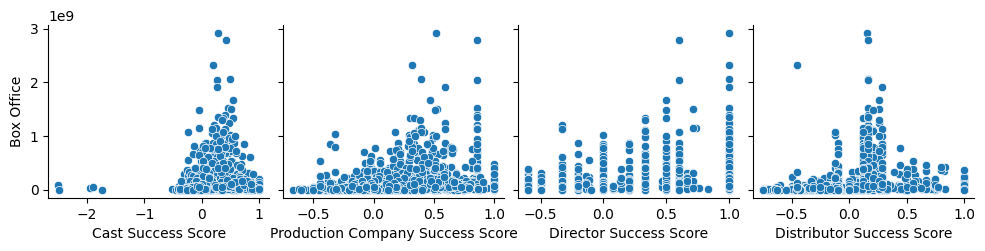

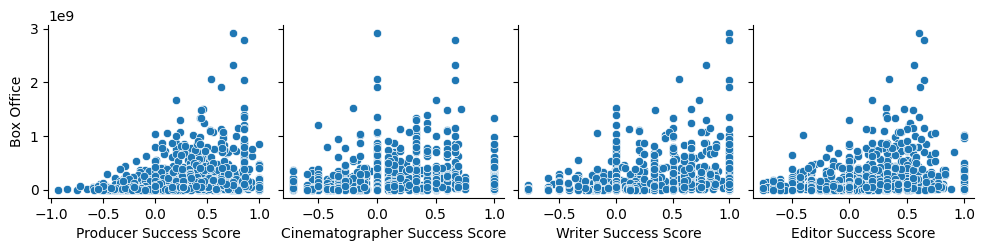

In [76]:
sb.pairplot(movies, y_vars=['Box Office'], x_vars=['Cast Success Score', 'Production Company Success Score', 'Director Success Score', 'Distributor Success Score'])
sb.pairplot(movies, y_vars=['Box Office'], x_vars=['Producer Success Score', 'Cinematographer Success Score', 'Writer Success Score', 'Editor Success Score'])

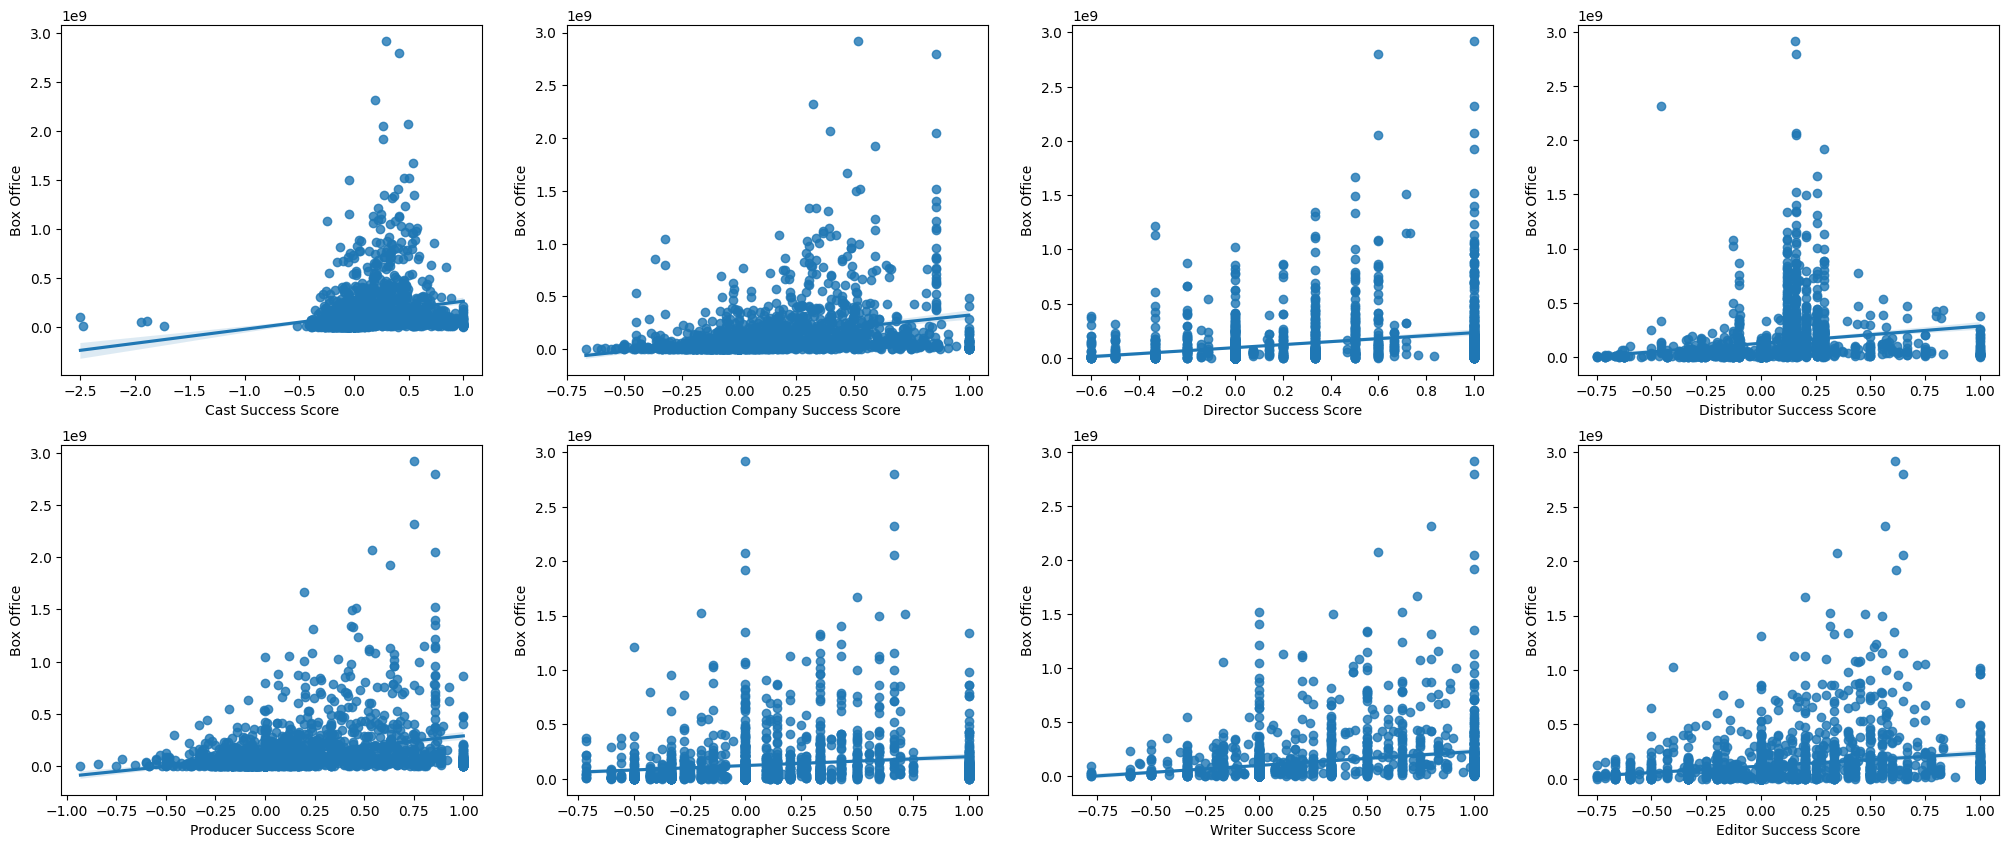

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(25, 10))

sns.regplot(data=movies, y='Box Office', x='Cast Success Score', ax=axs[0, 0])
sns.regplot(data=movies, y='Box Office', x='Production Company Success Score', ax=axs[0, 1])
sns.regplot(data=movies, y='Box Office', x='Director Success Score', ax=axs[0, 2])
sns.regplot(data=movies, y='Box Office', x='Distributor Success Score', ax=axs[0, 3])
sns.regplot(data=movies, y='Box Office', x='Producer Success Score', ax=axs[1,0])
sns.regplot(data=movies, y='Box Office', x='Cinematographer Success Score', ax=axs[1,1])
sns.regplot(data=movies, y='Box Office', x='Writer Success Score', ax=axs[1,2])
sns.regplot(data=movies, y='Box Office', x='Editor Success Score', ax=axs[1,3])

plt.show()

In [702]:
# # Calculate the mean success rate for all actors
# mean_success_rate = sum(actorSuccessFailureScore.values()) / len(actorSuccessFailureScore)

# # Calculate the Bayesian success rate for each actor
# actorSuccessRateBayesian = {actor: (actorMoviesCount[actor] * actorSuccessFailureScore[actor] + 10 * mean_success_rate) / (actorMoviesCount[actor] + 10) for actor in actors}

# # Function to calculate the cast success score for a movie
# def calculate_cast_success_score(cast):
#     return sum(actorSuccessRateBayesian.get(actor, 0) for actor in cast) / len(cast)

# # Calculate the cast success score for each movie
# movies['Cast Success Score'] = movies['Cast'].apply(calculate_cast_success_score)

In [703]:
# # Count the total number of movies for each actor
# actorMoviesCount = {actor: sum(actor in movieCast for movieCast in movies['Cast']) for actor in successfulActors}

# # Count the number of successful movies for each actor
# actorSuccessCount = {actor: successfulActors.count(actor) for actor in successfulActors}

# # Count the number of failed movies for each actor
# failedMovies = movies[movies['Box Office Status'] == 'Failure']
# failedActors = [actor for sublist in failedMovies['Cast'] for actor in sublist]
# actorFailureCount = {actor: failedActors.count(actor) for actor in successfulActors}

# # Calculate the success score for each actor
# actorSuccessScore = {actor: (actorSuccessCount[actor] - actorFailureCount.get(actor, 0)) / actorMoviesCount[actor] for actor in actorMoviesCount}

# # Function to calculate the cast success score for a movie
# def castSuccessScore(cast):
#     return sum(actorSuccessScore.get(actor, 0) for actor in cast) / len(cast)

# # Calculate the cast success score for each movie
# movies['Cast Success Score'] = movies['Cast'].apply(castSuccessScore)

In [704]:
# # Calculate the overall success rate of all movies
# overallSuccessRate = len(successfulMovies) / len(movies)

# # Define the prior successes and trials
# priorSuccesses = overallSuccessRate
# priorTrials = 1 - overallSuccessRate

# # Calculate the Bayesian success rate for each actor
# actorBayesianSuccessRate = {actor: (actorSuccessCount[actor] + priorSuccesses) / (actorMoviesCount[actor] + priorTrials) for actor in actorMoviesCount}

# # Function to calculate the cast Bayesian success rate for a movie
# def castBayesianSuccessRate(cast):
#     return sum(actorBayesianSuccessRate.get(actor, 0) for actor in cast) / len(cast)

# # Calculate the cast Bayesian success rate for each movie
# movies['Cast Bayesian Success Rate'] = movies['Cast'].apply(castBayesianSuccessRate)

## Data Encoding

### Target Encoding

In [705]:
moviesML = movies[['Cast Success Score', 'Director Success Score', 'Producer Success Score', 'Cinematographer Success Score', 'Runtime', 'Distributor Success Score', 'Writer Success Score', 'Editor Success Score', 'Production Company Success Score', 'Release Day', 'Release Month', 'Release Year', 'Age Rating', 'SentimentScore', 'Budget', 'Box Office Status']]

In [706]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
moviesML['Box Office Status'] = labelEncoder.fit_transform(moviesML['Box Office Status'])

C:\Users\tasin\AppData\Local\Temp\ipykernel_21908\22145744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesML['Box Office Status'] = labelEncoder.fit_transform(moviesML['Box Office Status'])


In [707]:
moviesML.head(10)

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.531868,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,R,0.642857,20000000,1
1,-0.039835,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,PG,0.830000,19000000,0
2,-0.206944,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,R,0.780000,18000000,0
3,0.148918,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,R,0.880000,80000000,0
4,-0.139456,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,PG,0.580000,28000000,0
5,-0.018519,0.0,0.000000,-0.200000,123,0.000000,0.0,0.000000,0.112821,14,5,2009,Not Rated,0.600000,3000000,0
6,-0.202020,0.0,-0.209524,0.272727,106,-0.250163,0.0,0.000000,-0.142857,22,1,2010,PG,0.645833,31000000,0
7,0.349524,1.0,0.800000,0.333333,100,0.287671,1.0,0.333333,0.507389,22,1,2010,R,0.740000,26000000,1
8,0.676190,0.0,-0.144444,-0.500000,101,0.157895,1.0,1.000000,0.214657,22,1,2010,PG,0.700000,48000000,1
9,1.000000,0.0,1.000000,1.000000,120,0.500000,1.0,1.000000,1.000000,5,11,2009,PG-13,0.730000,500000,1


In [708]:
moviesML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cast Success Score                1761 non-null   float64
 1   Director Success Score            1761 non-null   float64
 2   Producer Success Score            1761 non-null   float64
 3   Cinematographer Success Score     1761 non-null   float64
 4   Runtime                           1761 non-null   int64  
 5   Distributor Success Score         1761 non-null   float64
 6   Writer Success Score              1761 non-null   float64
 7   Editor Success Score              1761 non-null   float64
 8   Production Company Success Score  1761 non-null   float64
 9   Release Day                       1761 non-null   int32  
 10  Release Month                     1761 non-null   int32  
 11  Release Year                      1761 non-null   int64  
 12  Age Ra

In [709]:
moviesML['Age Rating'].unique()

array(['R', 'PG', 'Not Rated', 'PG-13', 'G', 'NC-17'], dtype=object)

In [710]:
moviesLE = moviesML.copy()
moviesOHE = moviesML.copy()

### Label Encoding

In [711]:
moviesLE['Age Rating'] = labelEncoder.fit_transform(moviesLE['Age Rating'])

In [712]:
moviesLE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,Release Month,Release Year,Age Rating,SentimentScore,Budget,Box Office Status
0,0.531868,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,9,2009,5,0.642857,20000000,1
1,-0.039835,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,1,2010,3,0.830000,19000000,0
2,-0.206944,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,10,2009,5,0.780000,18000000,0
3,0.148918,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,1,2010,5,0.880000,80000000,0
4,-0.139456,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,12,2009,3,0.580000,28000000,0


### One Hot Encoding

In [713]:
# Assuming you have a DataFrame called 'data' with a column named 'age_rating'
moviesOHE = pd.get_dummies(moviesML, columns=['Age Rating'])

In [714]:
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Box Office Status,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R
0,0.531868,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,1,False,False,False,False,False,True
1,-0.039835,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,False,False,False,True,False,False
2,-0.206944,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,False,False,False,False,False,True
3,0.148918,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,False,False,False,False,False,True
4,-0.139456,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,False,False,False,True,False,False


In [715]:
end_column = ['Box Office Status']
moviesOHE = moviesOHE[[column for column in moviesOHE if column not in end_column] + [column for column in end_column if column in moviesOHE]]
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.531868,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,False,False,False,False,False,True,1
1,-0.039835,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,False,False,False,True,False,False,0
2,-0.206944,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,False,False,False,False,False,True,0
3,0.148918,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,False,False,False,False,False,True,0
4,-0.139456,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,False,False,False,True,False,False,0


In [716]:
moviesOHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cast Success Score                1761 non-null   float64
 1   Director Success Score            1761 non-null   float64
 2   Producer Success Score            1761 non-null   float64
 3   Cinematographer Success Score     1761 non-null   float64
 4   Runtime                           1761 non-null   int64  
 5   Distributor Success Score         1761 non-null   float64
 6   Writer Success Score              1761 non-null   float64
 7   Editor Success Score              1761 non-null   float64
 8   Production Company Success Score  1761 non-null   float64
 9   Release Day                       1761 non-null   int32  
 10  Release Month                     1761 non-null   int32  
 11  Release Year                      1761 non-null   int64  
 12  Sentim

In [717]:
moviesOHE['Age Rating_G'] = labelEncoder.fit_transform(moviesOHE['Age Rating_G'])
moviesOHE['Age Rating_NC-17'] = labelEncoder.fit_transform(moviesOHE['Age Rating_NC-17'])
moviesOHE['Age Rating_Not Rated'] = labelEncoder.fit_transform(moviesOHE['Age Rating_Not Rated'])
moviesOHE['Age Rating_PG'] = labelEncoder.fit_transform(moviesOHE['Age Rating_PG'])
moviesOHE['Age Rating_PG-13'] = labelEncoder.fit_transform(moviesOHE['Age Rating_PG-13'])
moviesOHE['Age Rating_R'] = labelEncoder.fit_transform(moviesOHE['Age Rating_R'])

In [718]:
moviesOHE.head()

,Cast Success Score,Director Success Score,Producer Success Score,Cinematographer Success Score,Runtime,Distributor Success Score,Writer Success Score,Editor Success Score,Production Company Success Score,Release Day,...,Release Year,SentimentScore,Budget,Age Rating_G,Age Rating_NC-17,Age Rating_Not Rated,Age Rating_PG,Age Rating_PG-13,Age Rating_R,Box Office Status
0,0.531868,1.0,1.000000,1.000000,98,0.370370,1.0,0.666667,0.633333,11,...,2009,0.642857,20000000,0,0,0,0,0,1,1
1,-0.039835,0.0,-0.044444,0.090909,100,-0.100000,0.0,-0.666667,0.214286,6,...,2010,0.830000,19000000,0,0,0,1,0,0,0
2,-0.206944,0.0,-0.333333,0.000000,89,0.428571,0.0,-0.375000,0.000000,19,...,2009,0.780000,18000000,0,0,0,0,0,1,0
3,0.148918,0.0,-0.318182,0.333333,118,-0.154163,0.0,0.000000,-0.380952,15,...,2010,0.880000,80000000,0,0,0,0,0,1,0
4,-0.139456,0.0,-0.600000,-0.333333,94,-0.264474,0.0,-0.333333,0.142857,22,...,2009,0.580000,28000000,0,0,0,1,0,0,0


In [719]:
import pickle

def saveDataPickle(name, data):
    if hasattr(data, 'reset_index'):
        data = data.reset_index(drop=True)
    with open(name, 'wb') as f:
        pickle.dump(data, f)

In [720]:
saveDataPickle("WikipediaMovieDatasetLE.pickle", moviesLE)
saveDataPickle("WikipediaMovieDatasetOHE.pickle", moviesOHE)